In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp
import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0
%matplotlib inline
import imp
plt.style.use('seaborn-darkgrid')
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, 
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from numpy.linalg import svd
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF
from os import listdir

In [423]:
import src.LC_Clean_Assist as LCC
import src.LC_Plotter as LCP
import src.LC_Transformer as LCT
import src.LC_Models as LCM
imp.reload(LCP)
imp.reload(LCC)
imp.reload(LCT)
imp.reload(LCM)

<module 'src.LC_Models' from '/Users/adamricks/Documents/Galvanize/Capstone2/lending-club/src/LC_Models.py'>

Reduce Loan dataset to 100k loans

Balanced Train Set

Imbalanced Test Set

In [5]:
df = pd.read_csv('data/LC_Compiled.csv',low_memory=False)
df = LCC.clean_lc_for_plotting(df)

In [6]:
df = LCC.clean_lc_for_models(df)
df.to_csv('data/cleaned_data.csv',index=False)



In [372]:
df=pd.read_csv('data/cleaned_data.csv')


In [413]:
scaled_df = LCT.lc_transform(df)
rfc = RandomForestClassifier()
output_df = LCM.lc_mult_evaluate(scaled_df,rfc)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Testing with proportion 0.01




/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



[[ 31003      1]
 [125990     13]]


accuracy: 0.19754533237371583
precision: 0.9285714285714286
Return: 1.0
Testing with proportion 0.13458333333333333


[[ 30729    275]
 [119765   6238]]


accuracy: 0.23544810104008101
precision: 0.9577767541839398
Return: 6.5
Testing with proportion 0.25916666666666666


[[ 29875   1129]
 [109005  16998]]


accuracy: 0.29854082938977244
precision: 0.9377172174104926
Return: 6.6
Testing with proportion 0.38375000000000004


[[28698  2306]
 [97728 28275]]


accuracy: 0.3628691714382161
precision: 0.9245937019718126
Return: 6.7
Testing with proportion 0.5083333333333333


[[27275  3729]
 [87912 38091]]


accuracy: 0.4163253867661951
precision: 0.9108321377331421
Return: 6.8
Testing with proportion 0.6329166666666667


[[25864  5140]
 [78748 47255]]


accuracy: 0.46570535071684704
precision: 0.9018990361675733
Return: 6.6
Testing with proportion 0.7575000000000001


[[24464  6540]
 [70757 55246]]


accuracy: 0.5076843707605393
precision: 0.894150778493

In [415]:
output_df

,Proportions,Accuracy,Precision,Returns
0,0.010000,0.197545,0.928571,1.0
1,0.134583,0.235448,0.957777,6.5
2,0.259167,0.298541,0.937717,6.6
3,0.383750,0.362869,0.924594,6.7
4,0.508333,0.416325,0.910832,6.8
5,0.632917,0.465705,0.901899,6.6
6,0.757500,0.507684,0.894151,6.5
7,0.882083,0.542339,0.885932,6.5
8,1.006667,0.574439,0.880501,6.2
9,1.131250,0.601209,0.875009,6.3


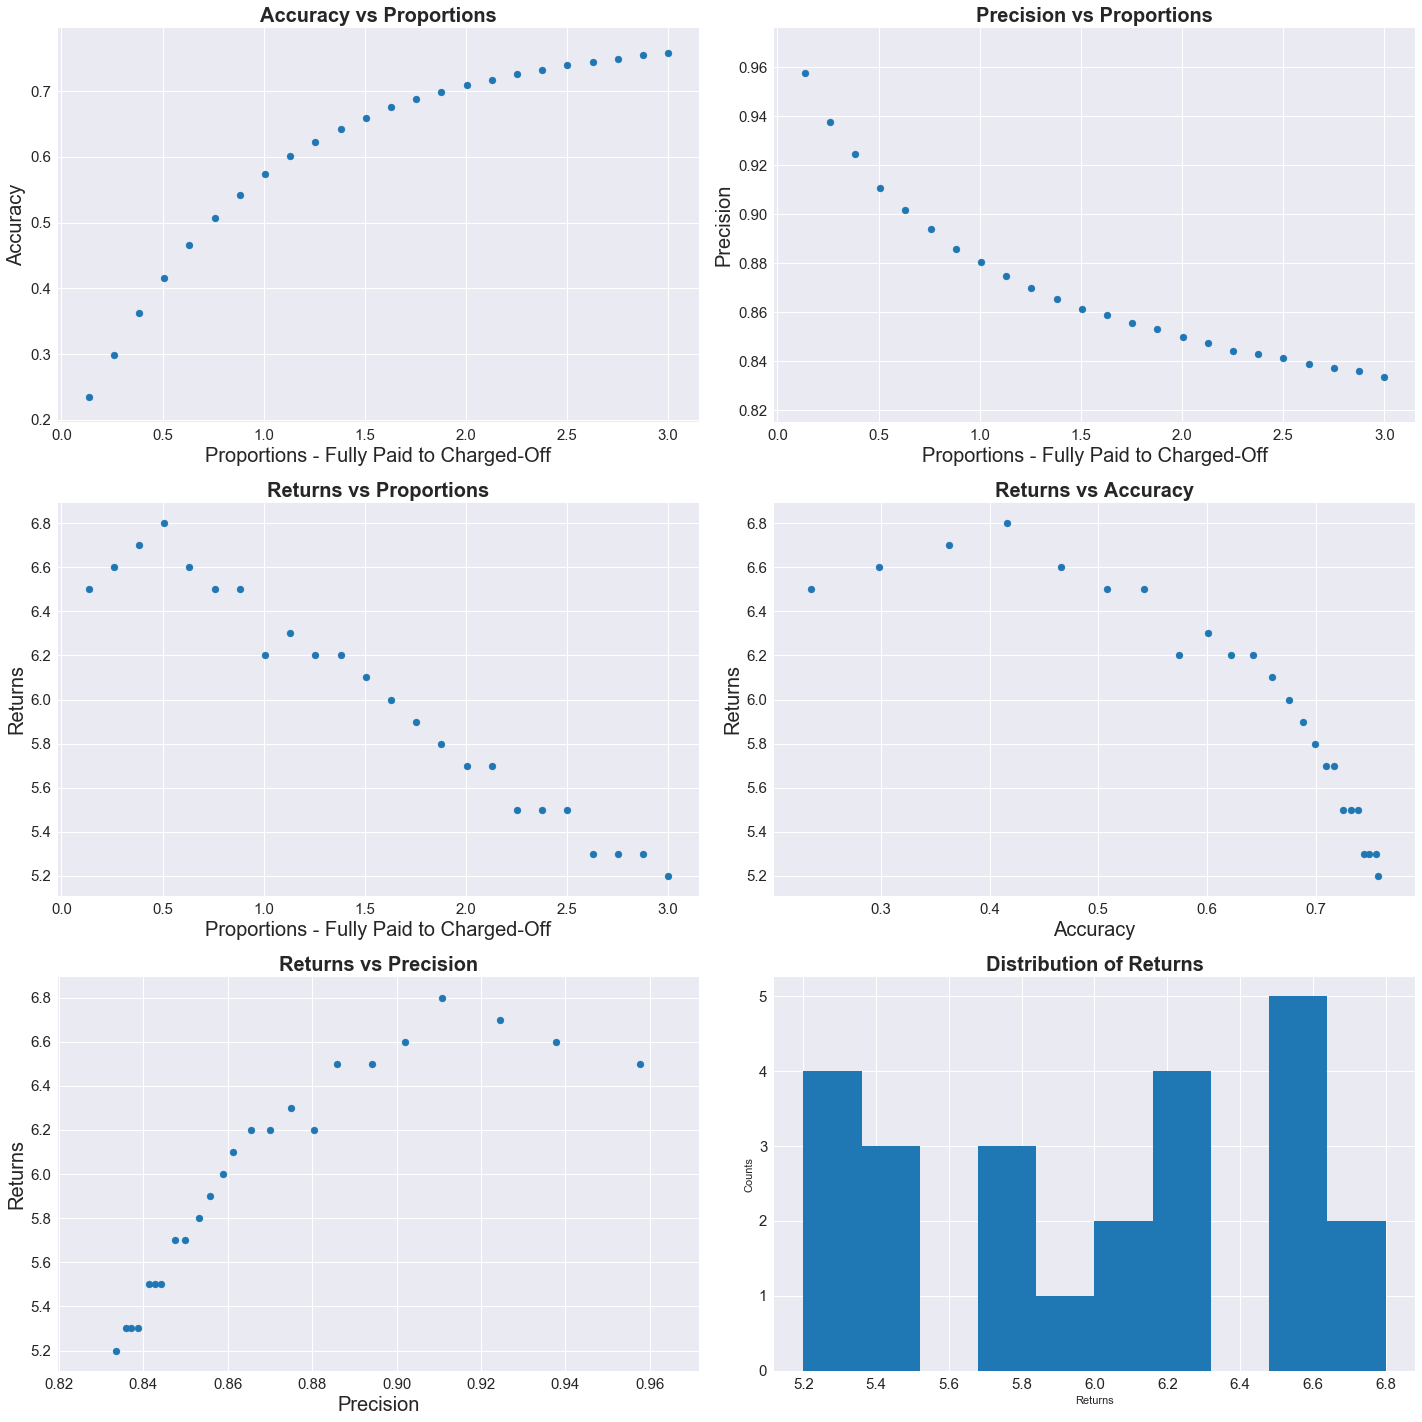

In [424]:
LCP.lc_choose_proportion(output_df)

In [426]:
X_train, X_test, y_train, y_test, train_loan_data, test_loan_data = LCT.lc_balance_sets(scaled_df,0.5)

In [441]:
# Tuning a logistic regression model
penalty = ['l1','l2']
C = np.arange(1,10,1)
logm = LogisticRegression(solver = 'liblinear')
logm_grid = GridSearchCV(logm,dict(penalty=penalty,C=C),cv=3,scoring='precision')
logm_grid.fit(X_train,y_train)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [442]:
logm_grid.best_params_

{'C': 8, 'penalty': 'l2'}

In [444]:
y_preds = logm_grid.best_estimator_.predict(X_test)
LCM.lc_score(y_test,y_preds,test_loan_data)

[[28039  2965]
 [86669 39334]]


accuracy: 0.42910825631978194
precision: 0.9299037802312111
Return: 6.6


(0.42910825631978194, 0.9299037802312111, 6.6)

In [467]:
params = {
 'min_samples_leaf': [15],
 'n_estimators': [110,115,120]}
rfc = RandomForestClassifier(max_depth=10,max_features='sqrt')
clf = GridSearchCV(rfc,params,scoring='precision',cv=3)
clf.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [468]:
clf.best_params_

{'min_samples_leaf': 15, 'n_estimators': 115}

In [469]:
y_preds = clf.best_estimator_.predict(X_test)
LCM.lc_score(y_test,y_preds,test_loan_data)

[[28675  2329]
 [91994 34009]]


accuracy: 0.39924334583808363
precision: 0.9359073146568331
Return: 6.0


(0.39924334583808363, 0.9359073146568331, 6.0)

In [473]:
params = {'n_estimators':[10,50],'learning_rate':[0.1],'max_depth':[3,6]}
gbc = GradientBoostingClassifier()
gbc_grid = GridSearchCV(gbc,params,scoring='precision',cv=3)
gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [474]:
y_preds = gbc_grid.predict(X_test)
LCM.lc_score(y_test,y_preds,test_loan_data)

[[ 29805   1199]
 [103805  22198]]


accuracy: 0.3312145318361602
precision: 0.9487541137752703
Return: 5.7


(0.3312145318361602, 0.9487541137752703, 5.7)

In [ ]:
params = {'n_estimators':[10,50],'learning_rate':[0.1],'max_depth':[3,6]}
xgb = XGBClassifier()
xgb_grid = GridSearchCV(xgb,params,scoring='precision',cv=3)
xgb_grid.fit(X_train,y_train)

In [ ]:
y_preds = xgb_grid.predict(X_test)
LCM.lc_score(y_test,y_preds,test_loan_data)